# 3. Técnicas de reduccion de la dimensionalidad

Seleccionamos una de las técnias de reduccion de la dimensionalidad para observar como influyen en los modelos. 
 
## PCA 

En primer lugar,  visuliazamos las correlación entre las difrentes variables par eliminar las que son rependintes 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style

# Preprocesado y modelado

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale


In [2]:
import warnings
warnings.filterwarnings('ignore')
datos = pd.read_csv('seleccion_variables_RF_bathandrooms.csv')


In [3]:
datos=datos.drop(columns=['Unnamed: 0'])
datos=datos.drop(columns=['Propertycount'])
datos=datos.drop(columns=['Postcode'])

corr_matrix=datos.corr(method='pearson')         
max_corr=corr_matrix['Price'].sort_values(ascending=False)
datos=datos.drop(columns=['Price'])

Elimina las categoricas y elimino los que tienen una correlacion considerable.

In [4]:
for i in datos.columns:
    if(isinstance(datos[str(i)].iloc[0], ( np.int64))  or isinstance(datos[str(i)].iloc[0],(np.float64))):
        corr_matrix=datos.corr(method='pearson')         
        max_corr=corr_matrix[str(i)].sort_values(ascending=False)
        print('los maximos que correlan con '+str(i)+" son: "+str(max_corr))
    else:
        datos=datos.drop(columns=[str(i)])

los maximos que correlan con Rooms son: Rooms            1.000000
Bathroom         0.625743
Car              0.428386
Distance         0.284897
Distancia_NEW    0.231615
Longtitude       0.081002
Location_TRA     0.062583
Landsize         0.038109
BathsAndRooms    0.035481
Lattitude        0.030054
Name: Rooms, dtype: float64
los maximos que correlan con Distance son: Distance         1.000000
Distancia_NEW    0.724924
Rooms            0.284897
Car              0.270078
Longtitude       0.236580
Bathroom         0.146762
Landsize         0.062874
Location_TRA     0.007773
BathsAndRooms   -0.013025
Lattitude       -0.075039
Name: Distance, dtype: float64
los maximos que correlan con Bathroom son: Bathroom         1.000000
Rooms            0.625743
Car              0.337007
Distance         0.146762
Longtitude       0.090214
Distancia_NEW    0.089090
Landsize         0.046138
BathsAndRooms    0.040813
Location_TRA    -0.003984
Lattitude       -0.035103
Name: Bathroom, dtype: float64
los 

Después de este análisis de correlación vemos que debemos eliminar los siguientes variables: Bathroom' , 'Distance' , 'Car' y 'BathsAndRooms'.

In [5]:
datos=datos.drop(columns=['Bathroom','Distance','Car','BathsAndRooms'])

datos.mean(axis=0)

datos = datos.apply (pd.to_numeric, errors='coerce')

datos = datos.dropna()
datos.reset_index(drop=True)

print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


Rooms            9.033151e-01
Landsize         1.056207e+07
Distancia_NEW    6.162103e+01
Longtitude       1.235392e-02
Lattitude        6.927646e-03
Location_TRA     6.319246e-05
dtype: float64

Entrenamos el modelo PCA con escalado de los datos. Probamos a eliminar variables para reducir el número de componentes, pero finalmente se ha decicio seleccionar las que ya teniamos debido a la ifluecia que tienen en las variables. 

In [6]:
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos)


# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']



# Se combierte el array a dataframe para añadir nombres a los ejes.
componentes_df=pd.DataFrame(data = modelo_pca.components_,columns = datos.columns,index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6'])



Realizamos una visualizacion de las componentes para visualizar la influencia de cada variable sobre las componentes. 

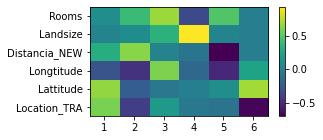

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Explicamos el porcentaje de varianza explicada por cada componente.

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[3.51798359e-01 2.00687423e-01 1.85926240e-01 1.63405306e-01
 9.80975140e-02 8.51571341e-05]


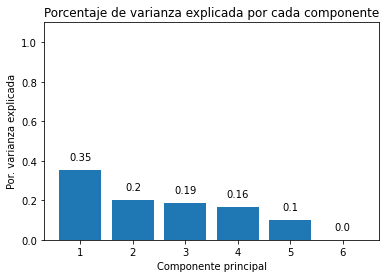

In [8]:
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');



Para llegar a un porcentaje alto debiamos usar muchas componentes, lo que  empeora la interpretabilidad del modelo decidimos usar las variables ya seleccionadas. 

Debido a que las componente 6 no influye en el modelo y la variable 'Location_TRA' es la que mas contribuye  a esta componente decidimos eliminarla  'Location_ TRA' de las variable selccionadas. 